# Silhouette Score: Advanced Theory & Interview Q&A

## Theory
Silhouette Score measures the quality of clustering by quantifying how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, with higher values indicating better-defined clusters. It is used for cluster validation and selection of optimal K.

| Aspect                | Details                                                                 |
|----------------------|-------------------------------------------------------------------------|
| Metric               | Silhouette coefficient                                                  |
| Range                | -1 (incorrect) to 1 (well-clustered)                                    |
| Strengths            | Intuitive, works for any clustering algorithm, helps select K           |
| Weaknesses           | Computationally expensive for large datasets, less informative for overlapping clusters |

## Advanced Interview Q&A
**Q1: How is the silhouette score calculated for a single sample?**
A1: It is (b - a) / max(a, b), where a = mean intra-cluster distance, b = mean nearest-cluster distance.

**Q2: What does a negative silhouette score indicate?**
A2: The sample may be assigned to the wrong cluster.

**Q3: How can silhouette analysis help in choosing the number of clusters?**
A3: Plot average silhouette scores for different K; the optimal K maximizes the score.

**Q4: What are the limitations of silhouette score for overlapping clusters?**
A4: It may not accurately reflect cluster quality when clusters overlap significantly.

**Q5: Is silhouette score applicable to non-Euclidean distances?**
A5: Yes, it can be computed using any distance metric, not just Euclidean.

Average Silhouette Score for k=3: 0.480


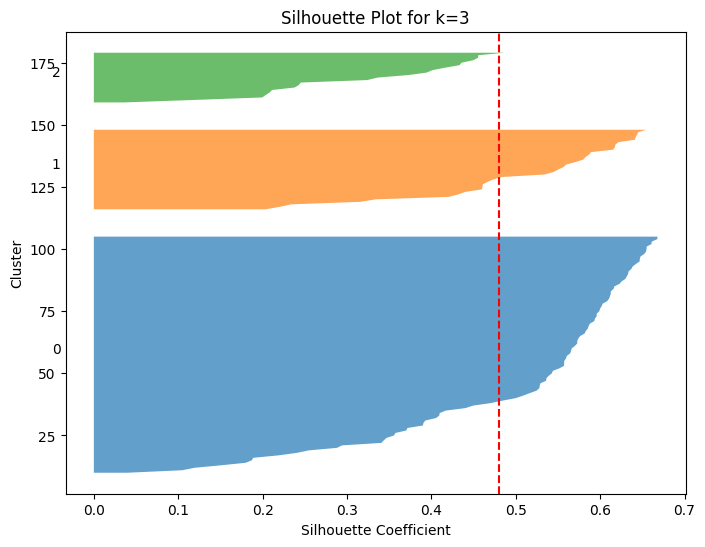

In [1]:
# 1️⃣ Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Load Dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

# 3️⃣ Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4️⃣ Apply K-Means with chosen k
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 5️⃣ Compute Silhouette Score
avg_score = silhouette_score(X_scaled, clusters)
print(f"Average Silhouette Score for k={k}: {avg_score:.3f}")

# 6️⃣ Compute Silhouette Values for Each Sample
sample_scores = silhouette_samples(X_scaled, clusters)

# 7️⃣ Visualize Silhouette Scores
plt.figure(figsize=(8,6))
y_lower = 10
for i in range(k):
    ith_cluster_scores = sample_scores[clusters == i]
    ith_cluster_scores.sort()
    plt.fill_betweenx(np.arange(y_lower, y_lower + len(ith_cluster_scores)),
                      0, ith_cluster_scores, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * len(ith_cluster_scores), str(i))
    y_lower += len(ith_cluster_scores) + 10

plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.title(f"Silhouette Plot for k={k}")
plt.axvline(x=avg_score, color="red", linestyle="--")
plt.show()
